In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/data/US_Accidents2.csv")

In [3]:
# data inspection
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  ...  \
0  2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN  ...   
1  2016-02-08 06:37:59  39.928059 -82.831184      NaN      NaN  ...   
2  2016-02-08 07:19:27  39.063148 -84.032608      NaN      NaN  ...   
3  2016-02-08 07:53:34  39.747753 -84.205582      NaN      NaN  ...   
4  2016-02-08 08:09:07  39.627781 -84.188354      NaN      NaN  ...   

   Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0       False   False  False           False          False        False   
1       False   False  False           False    

In [4]:
# Modify column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ' , '_' )

In [5]:
# Detect columns containing missig values
print(df.isnull().sum())

unnamed:_0                    0
id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  400000
end_lng                  400000
distance(mi)                  0
description                   0
street                        0
city                         19
county                        0
state                         0
zipcode                      43
country                       0
timezone                     43
airport_code                 44
weather_timestamp          3209
temperature(f)             5915
wind_chill(f)            340905
humidity(%)                6509
pressure(in)               4647
visibility(mi)             8779
wind_direction             3230
wind_speed(mph)           74171
precipitation(in)        357955
weather_condition          8208
amenity                       0
bump    

In [6]:
# Dealing with missing values
df.drop(['end_lat' , 'end_lng' , 'precipitation(in)' , 'start_lat' , 'start_lng' , 'unnamed:_0'] , axis=1 , inplace=True)

columns_to_impute = [
    'wind_speed(mph)',
    'distance(mi)', 
    'temperature(f)', 
    'wind_chill(f)', 
    'humidity(%)', 
    'pressure(in)', 
    'visibility(mi)'
]

column_means = df[columns_to_impute].mean()
df[columns_to_impute] = df[columns_to_impute].fillna(column_means)
df.dropna(inplace=True)
print(df.isnull().sum())

id                       0
source                   0
severity                 0
start_time               0
end_time                 0
distance(mi)             0
description              0
street                   0
city                     0
county                   0
state                    0
zipcode                  0
country                  0
timezone                 0
airport_code             0
weather_timestamp        0
temperature(f)           0
wind_chill(f)            0
humidity(%)              0
pressure(in)             0
visibility(mi)           0
wind_direction           0
wind_speed(mph)          0
weather_condition        0
amenity                  0
bump                     0
crossing                 0
give_way                 0
junction                 0
no_exit                  0
railway                  0
roundabout               0
station                  0
stop                     0
traffic_calming          0
traffic_signal           0
turning_loop             0
s

In [7]:
#Dealing with duplicate data
df.drop_duplicates(inplace=True)
print(df.shape)

(391753, 41)


In [8]:
# Data Type Formatting

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['weather_timestamp'] = pd.to_datetime(df['weather_timestamp'])
df['s_date'] = df['start_time'].dt.date
df['s_time'] = df['start_time'].dt.time

df['e_date'] = df['end_time'].dt.date
df['e_time'] = df['end_time'].dt.time

df['weather_time'] = df['weather_timestamp'].dt.time

df.drop(columns=['start_time', 'end_time', 'weather_timestamp'], inplace=True)


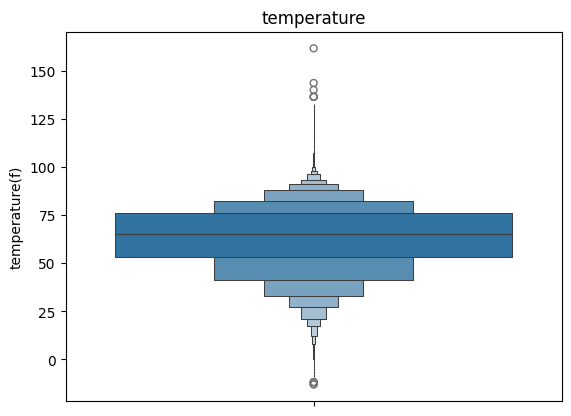

In [16]:
sns.boxenplot(y=df["temperature(f)"])
plt.title("temperature")
plt.show()

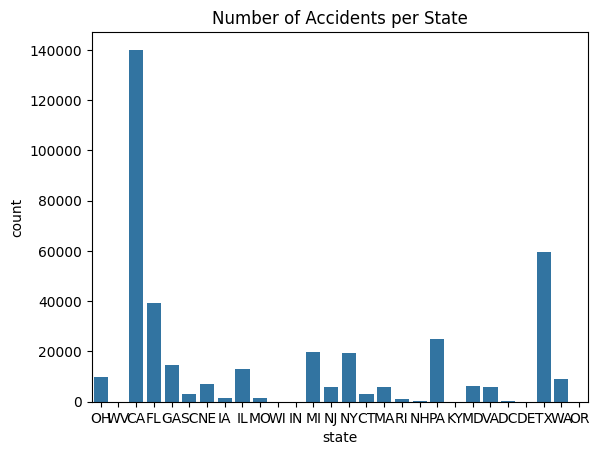

In [15]:
sns.countplot(x="state", data=df)
plt.title("Number of Accidents per State")
plt.show()


In [ ]:
df.to_csv("D:/data/US_Accidents_cleaned.csv")